<h1 align="center"> What Makes an Airbnb Superhost? </h1>
<h2 align="center"> An Exploratory Analysis of AirBNB Reviews</h2>
<h3 align="center"> By: John Easter, Josh Elam, Weitao Fu, Emily Moreland, Ryan Wainz </h3>
<h3 align="center"> Last Update: 04/10/2020 </h3>

# 1. Introduction

Airbnb, Inc. is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking. The company is based in San Francisco, California, United States. 

Since its founding in 2008, Airbnb has been one of the top travel sites for people who really want to be immersed in their destination city.

On the Airbnb platform, users have the opportunity to choose their lodging based on price, type of room, number of bedrooms, and most importantly, reviews left by past guests. Hosts also have the opportunity to gain the distinction of a “superhost”, which means that they have provided consistent hospitality to their guests and continue to go above and beyond for those staying in their home.

With our project we plan to make the customer absolutely clear on what specific property they should pursue based on their specific needs so they can have the best experience possible. 

Through this project, we want to answer the following questions:
* What makes someone a good host and gives them a “superhost” title?
     * Superhosts are important for letting the potential renter know that they are renting from an extraordinary and experienced host. 
     
* What types of attributes give listings good/bad reviews?
    * Cleanliness, location relative to popular tourists' sites, amenities (Netflix, Hulu, Cable), price, house rules, and host interactions with guests.
    
* How can we use a predictive model to estimate the quality of a listing?
    * Using a model tailored specifically for you and your needs on your trip.
    
* Which listing should we recommend to customers if they have special needs such as religions, pets, parking, disabilities, and children?
    * While pets and other commodities have made their way to the mainstream amenities for AirBnb's many hosts still do not factor in religion beliefs and disabilities into their rental properties. 

# 2. Data

We found our data set at the following link: https://www.kaggle.com/airbnb/seattle#listings.csv

Key information regarding what makes a "superhost" would be:
* Host response rate
* Host response time
* Experiences offered
* Amenitites
* Price
* Number of reviews
* Review scores rating

This data was directly scraped from the Airbnb website here: https://www.airbnb.com/s/Seattle--WA--United-States/all 

# 3. Data Manipulation

## 3.1 Calendar Dataset

In [839]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
cal = pd.read_csv("calendar.csv")
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [840]:
cal.info

<bound method DataFrame.info of          listing_id        date available   price
0            241032  2016-01-04         t  $85.00
1            241032  2016-01-05         t  $85.00
2            241032  2016-01-06         f     NaN
3            241032  2016-01-07         f     NaN
4            241032  2016-01-08         f     NaN
...             ...         ...       ...     ...
1393565    10208623  2016-12-29         f     NaN
1393566    10208623  2016-12-30         f     NaN
1393567    10208623  2016-12-31         f     NaN
1393568    10208623  2017-01-01         f     NaN
1393569    10208623  2017-01-02         f     NaN

[1393570 rows x 4 columns]>

listing_id: Id for each listing.<br>
date: A date from 01/04/2016 to 01/02/2017.<br>
available: Availability of a listing in a specific date.<br>
Price: Rent price of a listing in a specific date.<br>

In [841]:
pd.crosstab(index=cal['listing_id'],columns="count")

col_0,count
listing_id,
3335,365
4291,365
5682,365
6606,365
7369,365
...,...
10332096,365
10334184,365
10339144,365


Cal dataset stores the daily rent price of 3818 listings in a year.

In [842]:
cal = cal.dropna()

In [843]:
pd.crosstab(index=cal['listing_id'],columns="count")

col_0,count
listing_id,
3335,309
4291,365
5682,309
6606,365
7369,53
...,...
10331249,354
10332096,365
10334184,361


In [844]:
# Enable inline plotting in notebook
%matplotlib inline

In [845]:
cal

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00
...,...,...,...,...
1393207,10208623,2016-01-06,t,$87.00
1393208,10208623,2016-01-07,t,$87.00
1393211,10208623,2016-01-10,t,$87.00
1393212,10208623,2016-01-11,t,$87.00


In [846]:
cal['price'] = cal['price'].astype(str) 

c:\users\f1143\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [847]:
cal

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00
...,...,...,...,...
1393207,10208623,2016-01-06,t,$87.00
1393208,10208623,2016-01-07,t,$87.00
1393211,10208623,2016-01-10,t,$87.00
1393212,10208623,2016-01-11,t,$87.00


In [848]:
cal['price'] = cal['price'].str.replace('$','')
cal

c:\users\f1143\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,listing_id,date,available,price
0,241032,2016-01-04,t,85.00
1,241032,2016-01-05,t,85.00
9,241032,2016-01-13,t,85.00
10,241032,2016-01-14,t,85.00
14,241032,2016-01-18,t,85.00
...,...,...,...,...
1393207,10208623,2016-01-06,t,87.00
1393208,10208623,2016-01-07,t,87.00
1393211,10208623,2016-01-10,t,87.00
1393212,10208623,2016-01-11,t,87.00


In [849]:
cal['price'] = cal['price'].str.replace(',','')  # remove ',' of '1,234' 

c:\users\f1143\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [850]:
cal

,listing_id,date,available,price
0,241032,2016-01-04,t,85.00
1,241032,2016-01-05,t,85.00
9,241032,2016-01-13,t,85.00
10,241032,2016-01-14,t,85.00
14,241032,2016-01-18,t,85.00
...,...,...,...,...
1393207,10208623,2016-01-06,t,87.00
1393208,10208623,2016-01-07,t,87.00
1393211,10208623,2016-01-10,t,87.00
1393212,10208623,2016-01-11,t,87.00


In [851]:
cal['price'] = cal['price'].astype(float) 

c:\users\f1143\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [852]:
cal

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0
...,...,...,...,...
1393207,10208623,2016-01-06,t,87.0
1393208,10208623,2016-01-07,t,87.0
1393211,10208623,2016-01-10,t,87.0
1393212,10208623,2016-01-11,t,87.0


In [853]:
cal['date']=pd.to_datetime(cal['date'])
cal.head()

c:\users\f1143\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


In [854]:
cal['month'] = pd.DatetimeIndex(cal['date']).month

c:\users\f1143\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [855]:
averagePriceByMonth = cal.groupby('month')['price'].mean()
# average price of all listings in a month

In [856]:
averagePriceByMonth

month
1     122.912176
2     124.293927
3     128.644488
4     135.097005
5     139.538183
6     147.473137
7     152.094150
8     150.656594
9     143.255949
10    137.031939
11    135.688738
12    137.251835
Name: price, dtype: float64

In [857]:
averagePrice= pd.DataFrame(averagePriceByMonth)

In [858]:
averagePrice['month']= pd.Series(range(0,13))

In [859]:
averagePrice

,price,month
month,,
1,122.912176,1
2,124.293927,2
3,128.644488,3
4,135.097005,4
5,139.538183,5
6,147.473137,6
7,152.094150,7
8,150.656594,8
9,143.255949,9


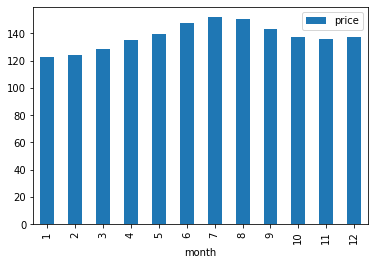

In [860]:
averagePrice.plot.bar(x='month',y='price')

In [861]:
cal.groupby('listing_id')['price'].mean() # Calculate the average rent price of each listing.

listing_id
3335        120.000000
4291         82.000000
5682         53.944984
6606         92.849315
7369         85.000000
               ...    
10331249     45.000000
10332096     40.000000
10334184    120.000000
10339145    237.904110
10340165     43.000000
Name: price, Length: 3723, dtype: float64

## 3.2 Reviews Dataset

In [862]:
rev = pd.read_csv("reviews.csv")
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [863]:
pd.crosstab(index=rev['listing_id'],columns="count")

col_0,count
listing_id,
4291,35
5682,297
6606,52
7369,40
9419,79
...,...
9995551,1
10012724,2
10020221,1


In [864]:
rev = rev.drop(columns=['id', 'reviewer_id','reviewer_name'])
rev

,listing_id,date,comments
0,7202016,2015-07-19,Cute and cozy place. Perfect location to every...
1,7202016,2015-07-20,Kelly has a great room in a very central locat...
2,7202016,2015-07-26,"Very spacious apartment, and in a great neighb..."
3,7202016,2015-08-02,Close to Seattle Center and all it has to offe...
4,7202016,2015-08-10,Kelly was a great host and very accommodating ...
...,...,...,...
84844,3624990,2015-10-12,The description and pictures of the apartment ...
84845,3624990,2015-10-17,We had an excellent stay. It was clean and com...
84846,3624990,2015-10-20,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,2015-11-02,"Very good apartement, clean and well sized. Si..."


In [865]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   listing_id  84849 non-null  int64 
 1   date        84849 non-null  object
 2   comments    84831 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [866]:
rev = rev.dropna()

In [867]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   listing_id  84831 non-null  int64 
 1   date        84831 non-null  object
 2   comments    84831 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


In [868]:
rev['newComments']=rev.comments.str.replace('[^a-zA-Z]', ' ').str.lower()

c:\users\f1143\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [869]:
rev

,listing_id,date,comments,newComments
0,7202016,2015-07-19,Cute and cozy place. Perfect location to every...,cute and cozy place perfect location to every...
1,7202016,2015-07-20,Kelly has a great room in a very central locat...,kelly has a great room in a very central locat...
2,7202016,2015-07-26,"Very spacious apartment, and in a great neighb...",very spacious apartment and in a great neighb...
3,7202016,2015-08-02,Close to Seattle Center and all it has to offe...,close to seattle center and all it has to offe...
4,7202016,2015-08-10,Kelly was a great host and very accommodating ...,kelly was a great host and very accommodating ...
...,...,...,...,...
84844,3624990,2015-10-12,The description and pictures of the apartment ...,the description and pictures of the apartment ...
84845,3624990,2015-10-17,We had an excellent stay. It was clean and com...,we had an excellent stay it was clean and com...
84846,3624990,2015-10-20,"Gran ubicación, cerca de todo lo atractivo del...",gran ubicaci n cerca de todo lo atractivo del...
84847,3624990,2015-11-02,"Very good apartement, clean and well sized. Si...",very good apartement clean and well sized si...


Get the most mentioned words from customers' review.

In [870]:
from collections import Counter
Counter(" ".join(rev["newComments"]).split()).most_common(100)

[('and', 289516),
 ('the', 286232),
 ('to', 175381),
 ('a', 175367),
 ('was', 163778),
 ('in', 100347),
 ('we', 97600),
 ('is', 89165),
 ('i', 81980),
 ('of', 73385),
 ('very', 72242),
 ('for', 68102),
 ('it', 61622),
 ('great', 60983),
 ('with', 55056),
 ('stay', 52128),
 ('place', 45537),
 ('s', 40637),
 ('seattle', 40322),
 ('our', 39789),
 ('were', 38493),
 ('had', 36056),
 ('you', 35261),
 ('this', 31927),
 ('us', 31884),
 ('my', 30148),
 ('at', 30128),
 ('as', 30121),
 ('clean', 29361),
 ('location', 28761),
 ('there', 26809),
 ('would', 26275),
 ('apartment', 26031),
 ('that', 26030),
 ('on', 25331),
 ('comfortable', 25215),
 ('but', 24536),
 ('nice', 23168),
 ('house', 22943),
 ('so', 22586),
 ('from', 22553),
 ('all', 21109),
 ('host', 21033),
 ('room', 20991),
 ('home', 20754),
 ('again', 20241),
 ('everything', 19825),
 ('she', 19252),
 ('t', 19166),
 ('have', 18361),
 ('neighborhood', 18236),
 ('easy', 18163),
 ('are', 18152),
 ('time', 17913),
 ('an', 17661),
 ('her', 1723

'clean','location','apartment','comfortable','house','host','home','everything','neighborhood','easy','downtown','space','quiet','experience',<br>'close','restaurants','area','bed','needed','helpful','walking','beautiful','friendly'

In [871]:
rev['date']=pd.to_datetime(rev['date'])
rev.head()

c:\users\f1143\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,listing_id,date,comments,newComments
0,7202016,2015-07-19,Cute and cozy place. Perfect location to every...,cute and cozy place perfect location to every...
1,7202016,2015-07-20,Kelly has a great room in a very central locat...,kelly has a great room in a very central locat...
2,7202016,2015-07-26,"Very spacious apartment, and in a great neighb...",very spacious apartment and in a great neighb...
3,7202016,2015-08-02,Close to Seattle Center and all it has to offe...,close to seattle center and all it has to offe...
4,7202016,2015-08-10,Kelly was a great host and very accommodating ...,kelly was a great host and very accommodating ...


In [872]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   listing_id   84831 non-null  int64         
 1   date         84831 non-null  datetime64[ns]
 2   comments     84831 non-null  object        
 3   newComments  84831 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.2+ MB


In [873]:
rev['month'] = pd.DatetimeIndex(rev['date']).month

c:\users\f1143\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [874]:
rev

,listing_id,date,comments,newComments,month
0,7202016,2015-07-19,Cute and cozy place. Perfect location to every...,cute and cozy place perfect location to every...,7
1,7202016,2015-07-20,Kelly has a great room in a very central locat...,kelly has a great room in a very central locat...,7
2,7202016,2015-07-26,"Very spacious apartment, and in a great neighb...",very spacious apartment and in a great neighb...,7
3,7202016,2015-08-02,Close to Seattle Center and all it has to offe...,close to seattle center and all it has to offe...,8
4,7202016,2015-08-10,Kelly was a great host and very accommodating ...,kelly was a great host and very accommodating ...,8
...,...,...,...,...,...
84844,3624990,2015-10-12,The description and pictures of the apartment ...,the description and pictures of the apartment ...,10
84845,3624990,2015-10-17,We had an excellent stay. It was clean and com...,we had an excellent stay it was clean and com...,10
84846,3624990,2015-10-20,"Gran ubicación, cerca de todo lo atractivo del...",gran ubicaci n cerca de todo lo atractivo del...,10
84847,3624990,2015-11-02,"Very good apartement, clean and well sized. Si...",very good apartement clean and well sized si...,11


In [875]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   listing_id   84831 non-null  int64         
 1   date         84831 non-null  datetime64[ns]
 2   comments     84831 non-null  object        
 3   newComments  84831 non-null  object        
 4   month        84831 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.9+ MB


In [876]:
reviewCount = pd.crosstab(index=rev['month'],columns="count")

In [877]:
reviewCount['month']= pd.Series(range(0,13))

In [878]:
reviewCount

col_0,count,month
month,,
1,2864,1
2,2642,2
3,4157,3
4,4231,4
5,5853,5
6,8542,6
7,10501,7
8,13017,8
9,11675,9


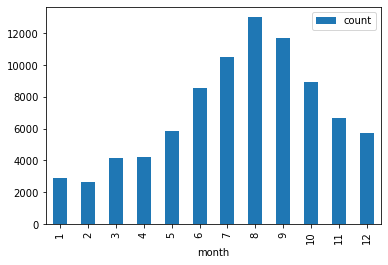

In [879]:
reviewCount.plot.bar(x='month',y='count')

## 3.3 Listings Dataset

In [880]:
lis = pd.read_csv("listings.csv")
lis.head()

,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,956883,Maija,within a few hours,96%,100%,f,3.0,t,t,...,10.0,10.0,9.0,10.0,f,f,moderate,f,2,4.07
1,953595,5177328,Andrea,within an hour,98%,100%,t,6.0,t,t,...,10.0,10.0,10.0,10.0,f,f,strict,t,6,1.48
2,3308979,16708587,Jill,within a few hours,67%,100%,f,2.0,t,t,...,10.0,10.0,10.0,10.0,f,f,strict,f,2,1.15
3,7421966,9851441,Emily,NaN,NaN,NaN,f,1.0,t,t,...,NaN,NaN,NaN,NaN,f,f,flexible,f,1,NaN
4,278830,1452570,Emily,within an hour,100%,NaN,f,2.0,t,t,...,10.0,10.0,9.0,9.0,f,f,strict,f,1,0.89


In [881]:
lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   host_id                           3818 non-null   int64  
 2   host_name                         3816 non-null   object 
 3   host_response_time                3295 non-null   object 
 4   host_response_rate                3295 non-null   object 
 5   host_acceptance_rate              3045 non-null   object 
 6   host_is_superhost                 3816 non-null   object 
 7   host_listings_count               3816 non-null   float64
 8   host_identity_verified            3816 non-null   object 
 9   is_location_exact                 3818 non-null   object 
 10  property_type                     3817 non-null   object 
 11  room_type                         3818 non-null   object 
 12  accomm

In [882]:
lis = lis.drop(columns=['host_name', 'host_identity_verified','is_location_exact','bathrooms','bedrooms',
                        'beds','guests_included','calendar_updated','has_availability',
                        'require_guest_phone_verification'])
lis

,id,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,property_type,room_type,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,241032,956883,within a few hours,96%,100%,f,3.0,Apartment,Entire home/apt,4,...,10.0,10.0,10.0,9.0,10.0,f,f,moderate,2,4.07
1,953595,5177328,within an hour,98%,100%,t,6.0,Apartment,Entire home/apt,4,...,10.0,10.0,10.0,10.0,10.0,f,f,strict,6,1.48
2,3308979,16708587,within a few hours,67%,100%,f,2.0,House,Entire home/apt,11,...,10.0,10.0,10.0,10.0,10.0,f,f,strict,2,1.15
3,7421966,9851441,NaN,NaN,NaN,f,1.0,Apartment,Entire home/apt,3,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,1,NaN
4,278830,1452570,within an hour,100%,NaN,f,2.0,House,Entire home/apt,6,...,9.0,10.0,10.0,9.0,9.0,f,f,strict,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,31148752,within a few hours,99%,100%,f,354.0,House,Entire home/apt,6,...,10.0,4.0,8.0,10.0,8.0,f,f,strict,8,0.30
3814,8902327,46566046,within an hour,100%,100%,f,1.0,Apartment,Entire home/apt,4,...,10.0,10.0,10.0,10.0,10.0,f,f,moderate,1,2.00
3815,10267360,52791370,NaN,NaN,NaN,f,1.0,House,Entire home/apt,2,...,NaN,NaN,NaN,NaN,NaN,f,f,moderate,1,NaN
3816,9604740,25522052,within an hour,100%,NaN,f,1.0,Condominium,Entire home/apt,2,...,NaN,NaN,NaN,NaN,NaN,f,f,moderate,1,NaN


In [883]:
lis = lis.dropna()

In [885]:
lis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 96 to 3810
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              62 non-null     int64  
 1   host_id                         62 non-null     int64  
 2   host_response_time              62 non-null     object 
 3   host_response_rate              62 non-null     object 
 4   host_acceptance_rate            62 non-null     object 
 5   host_is_superhost               62 non-null     object 
 6   host_listings_count             62 non-null     float64
 7   property_type                   62 non-null     object 
 8   room_type                       62 non-null     object 
 9   accommodates                    62 non-null     int64  
 10  bed_type                        62 non-null     object 
 11  amenities                       62 non-null     object 
 12  square_feet                     62 